In [9]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv
from sklearn import ensemble
from scripts.data_preprocessing import load_data, exclude_outliers
import numpy as np
import pandas as pd


# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)

param = {
    'loss': 'absolute_error',
    'n_estimators': 300,
    'max_depth': 10,
    'alpha': 0.5,
    'tol': 0.001,
}
gboost = ensemble.GradientBoostingRegressor(**param)

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



K-fold
Mean MSE: 111.29095823352019
Mean MAE: 5.311934629187429
Mean R2: -0.12075655157706718
RMSE: 10.549452982667878


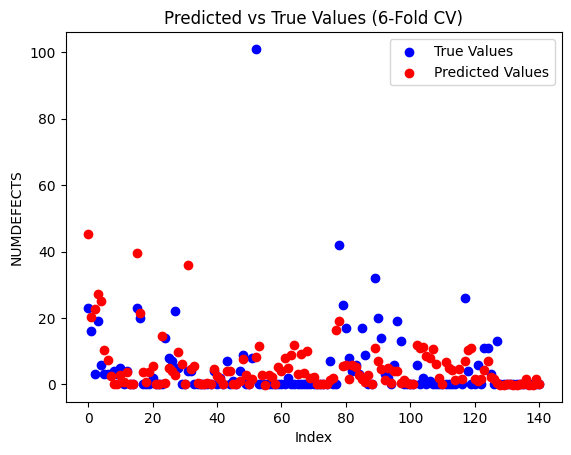

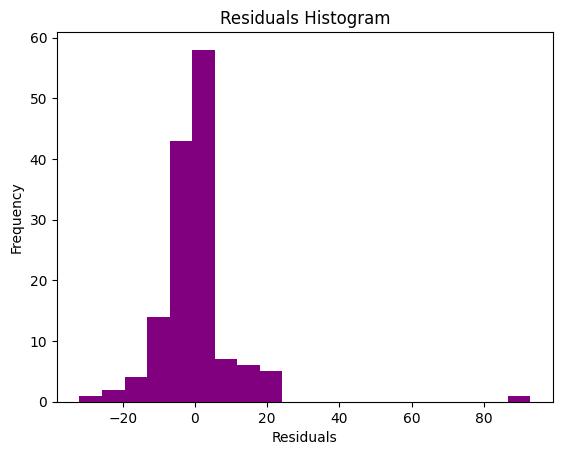

In [11]:
print('\nK-fold')
k_fold_results = k_fold_cv(X, y, gboost, 6)

LOOCV
R squared (LOOCV): -1.3675627220305238
Average MSE (LOOCV): 101.18336179780387
Average RMSE (LOOCV): 10.058994074846842
Average MAE (LOOCV): 4.616389197011666


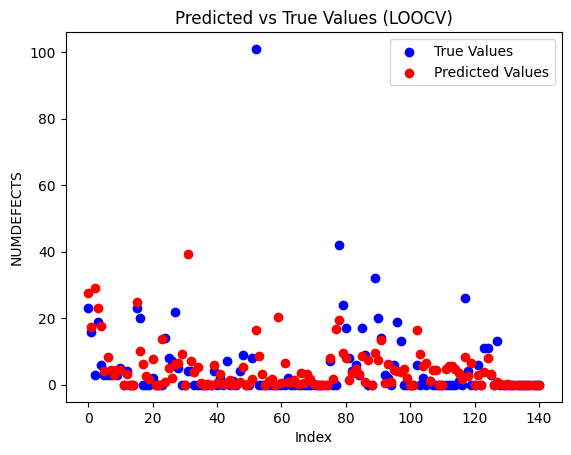

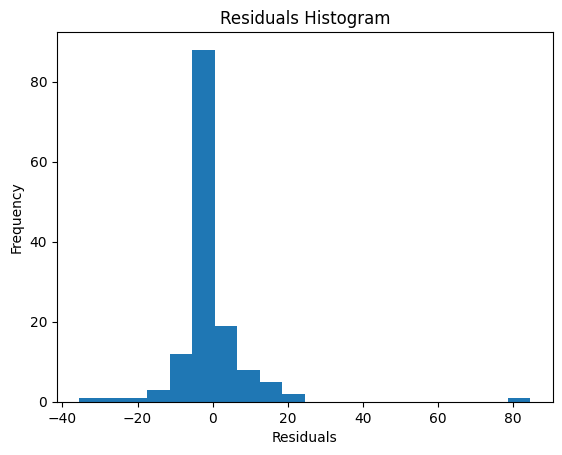

In [12]:
print('LOOCV')
loocv_results = loocv(X, y, gboost)

In [13]:
comparison_table = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results,
    '6-Fold': [
        np.mean(k_fold_results['test_r2']),
        np.mean(k_fold_results['test_mse']),
        np.sqrt(np.mean(k_fold_results['test_mse'])),
        np.mean(k_fold_results['test_mae'])
    ]
})

print(comparison_table)

  Metric       LOOCV     10-Fold
0     R2   -1.367563   -0.120757
1    MSE  101.183362  111.290958
2   RMSE   10.058994   10.549453
3    MAE    4.616389    5.311935


LOOCV
R squared (LOOCV): -0.8977943079485124
Average MSE (LOOCV): 28.899787008021907
Average RMSE (LOOCV): 5.3758522122563885
Average MAE (LOOCV): 3.3195603721421847


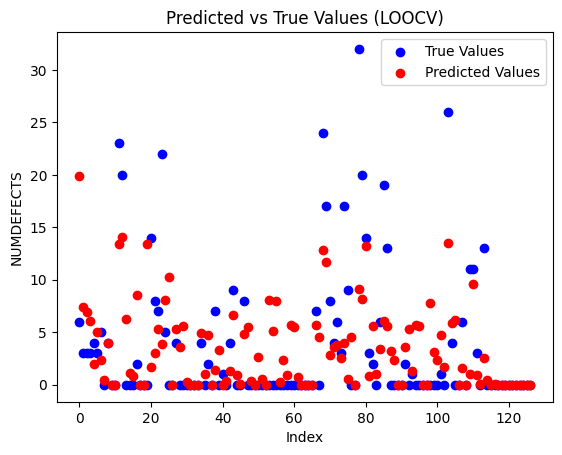

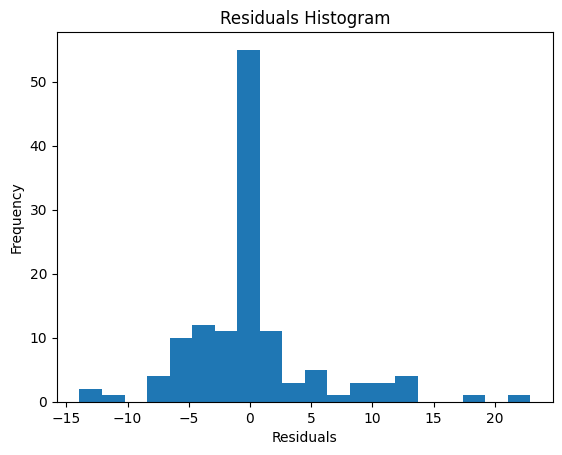


10-fold
Mean MSE: 37.96525211161888
Mean MAE: 4.025488268292712
Mean R2: -0.43624546260602415
RMSE: 6.161594932452058


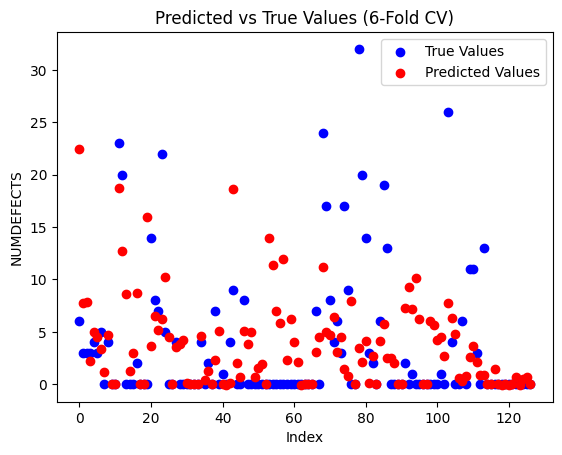

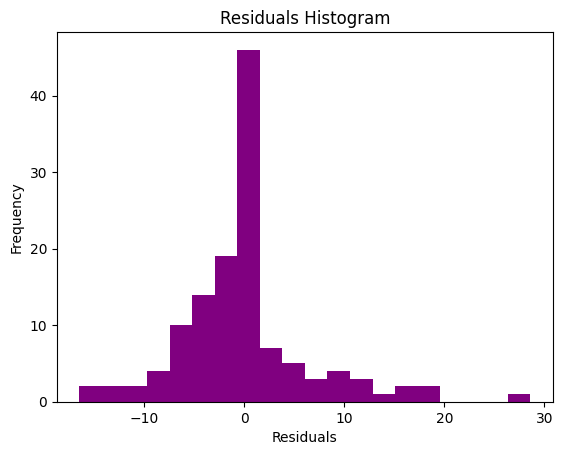

In [14]:
print('LOOCV')
loocv_results_filtered = loocv(X_filtered, y_filtered, gboost)

print('\n10-fold')
k_fold_results_filtered = k_fold_cv(X_filtered, y_filtered, gboost, 6)

In [15]:
comparison_table2 = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results_filtered,
    '10-Fold': [
        np.mean(k_fold_results_filtered['test_r2']),
        np.mean(k_fold_results_filtered['test_mse']),
        np.sqrt(np.mean(k_fold_results_filtered['test_mse'])),
        np.mean(k_fold_results_filtered['test_mae'])
    ]
})

print(comparison_table2)

  Metric      LOOCV    10-Fold
0     R2  -0.897794  -0.436245
1    MSE  28.899787  37.965252
2   RMSE   5.375852   6.161595
3    MAE   3.319560   4.025488
